# Diabetes

In [1]:
import pandas as pd

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.rename(columns = {'Outcome': 'diabetes'}, inplace = True)

Class 0: 0.6510416666666666
Class 1: 0.3489583333333333
Proportion: 0.54 : 1


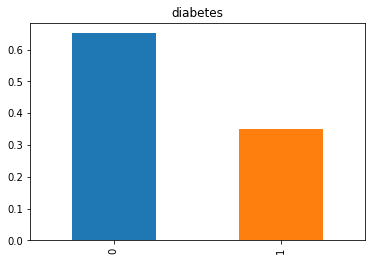

In [6]:
import matplotlib.pyplot as plt

exam_result_count = data['diabetes'].value_counts(normalize=True)
print('Class 0:', exam_result_count[0])
print('Class 1:', exam_result_count[1])
print('Proportion:', round(exam_result_count[1] / exam_result_count[0], 2), ': 1')

exam_result_count.plot(kind='bar', title='diabetes',color = ['#1F77B4', '#FF7F0E']);

In [7]:
import warnings
warnings.filterwarnings('ignore')

for i in range(1,7):
    
    data.iloc[:,i][data.iloc[:,i] == 0] = None

In [8]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
diabetes                      0
dtype: int64

In [9]:
df_x = data.drop([
'diabetes'
], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_all = df_x
y_all = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25 ,random_state = 23)

print('Numero de observaçoes do treino:', len(X_train))
print('Numero de observaçoes da teste fora do tempo:',len(X_test))

Numero de observaçoes do treino: 576
Numero de observaçoes da teste fora do tempo: 192


In [12]:
from fancyimpute import KNN    
#Use 5 nearest rows which have a feature to fill in each row's missing features
X_train = KNN(k=5).fit_transform(X_train)
X_test = KNN(k=5).fit_transform(X_test)

Using TensorFlow backend.


Imputing row 1/576 with 1 missing, elapsed time: 0.051
Imputing row 101/576 with 1 missing, elapsed time: 0.053
Imputing row 201/576 with 0 missing, elapsed time: 0.055
Imputing row 301/576 with 1 missing, elapsed time: 0.057
Imputing row 401/576 with 0 missing, elapsed time: 0.060
Imputing row 501/576 with 0 missing, elapsed time: 0.061
Imputing row 1/192 with 2 missing, elapsed time: 0.008
Imputing row 101/192 with 2 missing, elapsed time: 0.011


In [13]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler() 
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

## Modelagem

In [14]:
import time
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import average_precision_score, make_scorer, roc_curve,f1_score, precision_score, recall_score, fbeta_score, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report,precision_recall_curve

In [15]:
from scipy.stats import ks_2samp

def fit_and_print(model, X_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  

In [17]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Random Forest

In [18]:
# from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 665)

params = {'n_estimators' : [300,576],    
          'max_depth': [30, 50],
          'max_features': [5, 8],
          'min_samples_split' : [0.01,0.05]
         }

gsRFC = GridSearchCV(estimator = clf,
                          param_grid = params,
#                           scoring = "recall",
                          cv = 5 
)

inicio = time.time()
gsRFC.fit(X_train, y_train)
fim = time.time()

print(fim - inicio)
print(gsRFC.best_score_)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_estimator_)
print(gsRFC.best_params_)

65.40896773338318
0.7448725637181409
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.05,
                       min_weight_fraction_leaf=0.0, n_estimators=576,
                       n_jobs=None, oob_score=False, random_state=665,
                       verbose=0, warm_start=False)
{'max_depth': 30, 'max_features': 5, 'min_samples_split': 0.05, 'n_estimators': 576}


In [19]:
fit_and_print(RFC_best, X_test)

Confusion Matrix: 
 [[110  16]
 [ 26  40]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.71      0.61      0.66        66

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [20]:
roc_auc_score(y_test, RFC_best.predict(X_test))

0.7395382395382395

Text(0.5,1,'Random Forest feature importance')

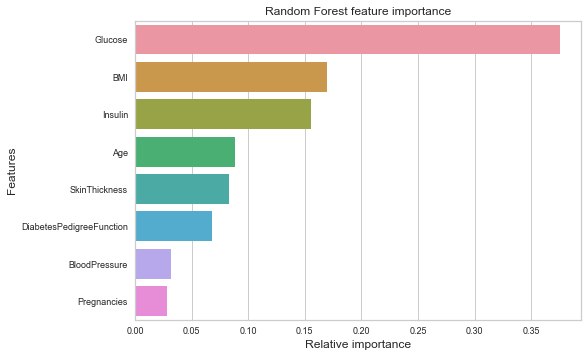

In [21]:
import seaborn as sns
import numpy as np
names_classifiers = [("Random Forest",RFC_best)]
classifier = names_classifiers[0][1]
name = names_classifiers[0][0]
indices = np.argsort(classifier.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_all.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title(name + " feature importance")

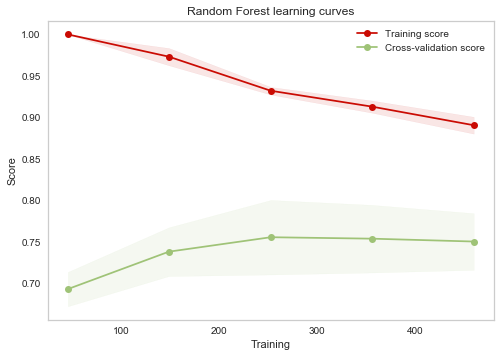

In [22]:
g = plot_learning_curve(RFC_best,"Random Forest learning curves",X_train, y_train,cv=5)

### Logistic Regression

In [23]:
logreg = GridSearchCV(estimator = LogisticRegression(),
                          param_grid = {'C': [1, 10,100], 'class_weight': [None, 'balanced'], 'max_iter':[10000], 'penalty' : ['l1', 'l2']},
                          cv = 5)
logreg.fit(X_train ,y_train)

logreg_best = logreg.best_estimator_

# Best score
logreg.best_score_

0.7569865067466267

In [24]:
fit_and_print(logreg_best, X_test)

Confusion Matrix: 
 [[109  17]
 [ 25  41]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.71      0.62      0.66        66

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [25]:
roc_auc_score(y_test, RFC_best.predict(X_test))

0.7395382395382395

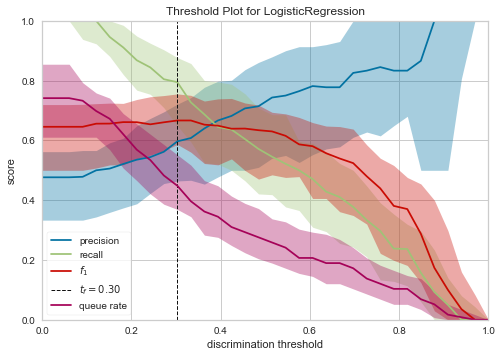

In [26]:
visualizer_LR_best = DiscriminationThreshold(logreg_best)
visualizer_LR_best.fit(X_train,y_train)
visualizer_LR_best.poof()

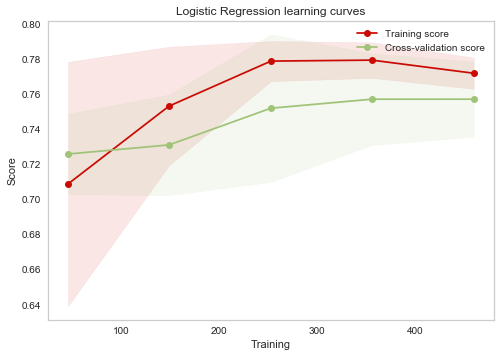

In [27]:
g = plot_learning_curve(logreg_best,"Logistic Regression learning curves",X_train, y_train,cv=5)

### SVM

In [28]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [0.1, 1, 10]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=5, n_jobs= 1, verbose = 1)

gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


0.7587556221889056

In [29]:
fit_and_print(SVMC_best, X_test)

Confusion Matrix: 
 [[117   9]
 [ 27  39]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       126
           1       0.81      0.59      0.68        66

    accuracy                           0.81       192
   macro avg       0.81      0.76      0.78       192
weighted avg       0.81      0.81      0.80       192



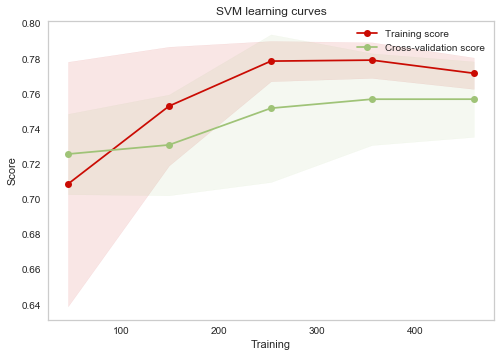

In [30]:
g = plot_learning_curve(logreg_best,"SVM learning curves",X_train, y_train,cv=5)

### Ensemble

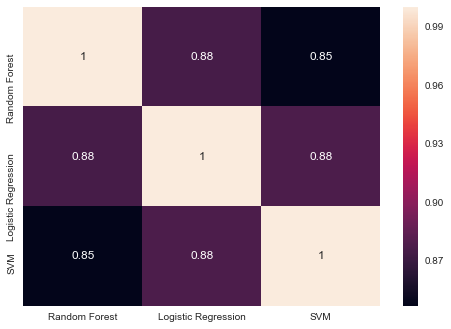

In [31]:
test_Survived_RF = pd.Series(RFC_best.predict(X_test), name="Random Forest")
test_Survived_LogReg = pd.Series(logreg_best.predict(X_test), name= "Logistic Regression")
test_Survived_SVM = pd.Series(SVMC_best.predict(X_test), name="SVM")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RF,test_Survived_LogReg, test_Survived_SVM],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

In [32]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('logreg', logreg_best), ('svm', SVMC_best)], voting='soft', n_jobs=1)

votingC = votingC.fit(X_train, y_train)

In [33]:
votingC.score

<bound method ClassifierMixin.score of VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=30,
                                                     max_features=5,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=0.05,
                                                     mi

In [34]:
fit_and_print(votingC, X_test)

Confusion Matrix: 
 [[111  15]
 [ 25  41]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       126
           1       0.73      0.62      0.67        66

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192

